In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mimg
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPool2D, Activation, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

In [ ]:
import pandas as pd
data = pd.read_csv("fer2013.csv")

In [ ]:
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [ ]:
data.info

<bound method DataFrame.info of        emotion                                             pixels        Usage
0            0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...     Training
1            0  151 150 147 155 148 133 111 140 170 174 182 15...     Training
2            2  231 212 156 164 174 138 161 173 182 200 106 38...     Training
3            4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...     Training
4            6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...     Training
...        ...                                                ...          ...
35882        6  50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...  PrivateTest
35883        3  178 174 172 173 181 188 191 194 196 199 200 20...  PrivateTest
35884        0  17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...  PrivateTest
35885        3  30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...  PrivateTest
35886        2  19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...  PrivateTest

[35887 rows x 3 col

In [ ]:
data.dtypes

emotion     int64
pixels     object
Usage      object
dtype: object

In [ ]:
pixeldf = data.pixels.str.split(" ",expand=True)

In [ ]:
print(pixeldf)

      0    1    2    3    4    5    6     ... 2297 2298 2299 2300 2301 2302 2303
0       70   80   82   72   58   58   60  ...  136  106  116   95  106  109   82
1      151  150  147  155  148  133  111  ...  108  102   67  171  193  183  184
2      231  212  156  164  174  138  161  ...  122  114  101   97   88  110  152
3       24   32   36   30   32   23   19  ...  132  133  136  139  142  143  142
4        4    0    0    0    0    0    0  ...   31   31   27   31   30   29   30
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
35882   50   36   17   22   23   29   33  ...  217  221  222  220  223  221  216
35883  178  174  172  173  181  188  191  ...  118   66    7    0    0    0    0
35884   17   17   16   23   28   22   19  ...  193  194  170  148  154  133  113
35885   30   28   28   29   31   30   42  ...   26   28   35   35   35   30   28
35886   19   13   14   12   13   16   21  ...  195  151   99  146  189  199  201

[35887 rows x 2304 columns]

In [ ]:
pixeldf = pixeldf.astype('float32')

In [ ]:
pixeldf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2264,2265,2266,2267,2268,2269,2270,2271,2272,2273,2274,2275,2276,2277,2278,2279,2280,2281,2282,2283,2284,2285,2286,2287,2288,2289,2290,2291,2292,2293,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,70.0,80.0,82.0,72.0,58.0,58.0,60.0,63.0,54.0,58.0,60.0,48.0,89.0,115.0,121.0,119.0,115.0,110.0,98.0,91.0,84.0,84.0,90.0,99.0,110.0,126.0,143.0,153.0,158.0,171.0,169.0,172.0,169.0,165.0,129.0,110.0,113.0,107.0,95.0,79.0,...,20.0,31.0,40.0,46.0,65.0,88.0,108.0,110.0,125.0,149.0,157.0,153.0,162.0,164.0,158.0,159.0,154.0,140.0,78.0,21.0,11.0,61.0,144.0,168.0,173.0,157.0,138.0,150.0,148.0,132.0,159.0,182.0,183.0,136.0,106.0,116.0,95.0,106.0,109.0,82.0
1,151.0,150.0,147.0,155.0,148.0,133.0,111.0,140.0,170.0,174.0,182.0,154.0,153.0,164.0,173.0,178.0,185.0,185.0,189.0,187.0,186.0,193.0,194.0,185.0,183.0,186.0,180.0,173.0,166.0,161.0,147.0,133.0,172.0,151.0,114.0,161.0,161.0,146.0,131.0,104.0,...,150.0,129.0,143.0,135.0,115.0,102.0,111.0,124.0,112.0,109.0,132.0,146.0,135.0,149.0,148.0,143.0,163.0,156.0,159.0,150.0,139.0,128.0,116.0,125.0,133.0,109.0,130.0,147.0,130.0,121.0,105.0,108.0,95.0,108.0,102.0,67.0,171.0,193.0,183.0,184.0
2,231.0,212.0,156.0,164.0,174.0,138.0,161.0,173.0,182.0,200.0,106.0,38.0,39.0,74.0,138.0,161.0,164.0,179.0,190.0,201.0,210.0,216.0,220.0,224.0,222.0,218.0,216.0,213.0,217.0,220.0,220.0,218.0,217.0,212.0,174.0,160.0,162.0,160.0,139.0,135.0,...,225.0,220.0,215.0,207.0,199.0,167.0,108.0,151.0,122.0,88.0,71.0,84.0,120.0,127.0,105.0,76.0,71.0,78.0,90.0,106.0,123.0,146.0,155.0,148.0,130.0,141.0,119.0,69.0,54.0,89.0,104.0,138.0,152.0,122.0,114.0,101.0,97.0,88.0,110.0,152.0
3,24.0,32.0,36.0,30.0,32.0,23.0,19.0,20.0,30.0,41.0,21.0,22.0,32.0,34.0,21.0,19.0,43.0,52.0,13.0,26.0,40.0,59.0,65.0,12.0,20.0,63.0,99.0,98.0,98.0,111.0,75.0,62.0,41.0,73.0,118.0,140.0,192.0,186.0,187.0,188.0,...,124.0,150.0,161.0,167.0,169.0,167.0,162.0,164.0,169.0,181.0,172.0,168.0,169.0,170.0,174.0,179.0,180.0,182.0,196.0,208.0,226.0,230.0,140.0,113.0,114.0,125.0,135.0,141.0,172.0,214.0,174.0,126.0,132.0,132.0,133.0,136.0,139.0,142.0,143.0,142.0
4,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,15.0,23.0,28.0,48.0,50.0,58.0,84.0,115.0,127.0,137.0,142.0,151.0,156.0,155.0,149.0,153.0,152.0,157.0,160.0,162.0,159.0,145.0,121.0,83.0,58.0,48.0,38.0,...,18.0,27.0,19.0,13.0,11.0,22.0,37.0,48.0,55.0,67.0,88.0,95.0,112.0,118.0,123.0,141.0,157.0,174.0,181.0,185.0,184.0,179.0,176.0,171.0,155.0,128.0,105.0,10.0,0.0,0.0,12.0,34.0,31.0,31.0,31.0,27.0,31.0,30.0,29.0,30.0


In [ ]:
data = data.join(pixeldf)

In [ ]:
data.head()

,emotion,pixels,Usage,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,...,2264,2265,2266,2267,2268,2269,2270,2271,2272,2273,2274,2275,2276,2277,2278,2279,2280,2281,2282,2283,2284,2285,2286,2287,2288,2289,2290,2291,2292,2293,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training,70.0,80.0,82.0,72.0,58.0,58.0,60.0,63.0,54.0,58.0,60.0,48.0,89.0,115.0,121.0,119.0,115.0,110.0,98.0,91.0,84.0,84.0,90.0,99.0,110.0,126.0,143.0,153.0,158.0,171.0,169.0,172.0,169.0,165.0,129.0,110.0,113.0,...,20.0,31.0,40.0,46.0,65.0,88.0,108.0,110.0,125.0,149.0,157.0,153.0,162.0,164.0,158.0,159.0,154.0,140.0,78.0,21.0,11.0,61.0,144.0,168.0,173.0,157.0,138.0,150.0,148.0,132.0,159.0,182.0,183.0,136.0,106.0,116.0,95.0,106.0,109.0,82.0
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training,151.0,150.0,147.0,155.0,148.0,133.0,111.0,140.0,170.0,174.0,182.0,154.0,153.0,164.0,173.0,178.0,185.0,185.0,189.0,187.0,186.0,193.0,194.0,185.0,183.0,186.0,180.0,173.0,166.0,161.0,147.0,133.0,172.0,151.0,114.0,161.0,161.0,...,150.0,129.0,143.0,135.0,115.0,102.0,111.0,124.0,112.0,109.0,132.0,146.0,135.0,149.0,148.0,143.0,163.0,156.0,159.0,150.0,139.0,128.0,116.0,125.0,133.0,109.0,130.0,147.0,130.0,121.0,105.0,108.0,95.0,108.0,102.0,67.0,171.0,193.0,183.0,184.0
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training,231.0,212.0,156.0,164.0,174.0,138.0,161.0,173.0,182.0,200.0,106.0,38.0,39.0,74.0,138.0,161.0,164.0,179.0,190.0,201.0,210.0,216.0,220.0,224.0,222.0,218.0,216.0,213.0,217.0,220.0,220.0,218.0,217.0,212.0,174.0,160.0,162.0,...,225.0,220.0,215.0,207.0,199.0,167.0,108.0,151.0,122.0,88.0,71.0,84.0,120.0,127.0,105.0,76.0,71.0,78.0,90.0,106.0,123.0,146.0,155.0,148.0,130.0,141.0,119.0,69.0,54.0,89.0,104.0,138.0,152.0,122.0,114.0,101.0,97.0,88.0,110.0,152.0
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training,24.0,32.0,36.0,30.0,32.0,23.0,19.0,20.0,30.0,41.0,21.0,22.0,32.0,34.0,21.0,19.0,43.0,52.0,13.0,26.0,40.0,59.0,65.0,12.0,20.0,63.0,99.0,98.0,98.0,111.0,75.0,62.0,41.0,73.0,118.0,140.0,192.0,...,124.0,150.0,161.0,167.0,169.0,167.0,162.0,164.0,169.0,181.0,172.0,168.0,169.0,170.0,174.0,179.0,180.0,182.0,196.0,208.0,226.0,230.0,140.0,113.0,114.0,125.0,135.0,141.0,172.0,214.0,174.0,126.0,132.0,132.0,133.0,136.0,139.0,142.0,143.0,142.0
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,15.0,23.0,28.0,48.0,50.0,58.0,84.0,115.0,127.0,137.0,142.0,151.0,156.0,155.0,149.0,153.0,152.0,157.0,160.0,162.0,159.0,145.0,121.0,83.0,...,18.0,27.0,19.0,13.0,11.0,22.0,37.0,48.0,55.0,67.0,88.0,95.0,112.0,118.0,123.0,141.0,157.0,174.0,181.0,185.0,184.0,179.0,176.0,171.0,155.0,128.0,105.0,10.0,0.0,0.0,12.0,34.0,31.0,31.0,31.0,27.0,31.0,30.0,29.0,30.0


In [ ]:
data.info

<bound method DataFrame.info of        emotion                                             pixels  ...   2302   2303
0            0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  ...  109.0   82.0
1            0  151 150 147 155 148 133 111 140 170 174 182 15...  ...  183.0  184.0
2            2  231 212 156 164 174 138 161 173 182 200 106 38...  ...  110.0  152.0
3            4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  ...  143.0  142.0
4            6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  ...   29.0   30.0
...        ...                                                ...  ...    ...    ...
35882        6  50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...  ...  221.0  216.0
35883        3  178 174 172 173 181 188 191 194 196 199 200 20...  ...    0.0    0.0
35884        0  17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...  ...  133.0  113.0
35885        3  30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...  ...   30.0   28.0
35886        2  19 13 14 12 13 16

In [ ]:
data.describe()

,emotion,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,2264,2265,2266,2267,2268,2269,2270,2271,2272,2273,2274,2275,2276,2277,2278,2279,2280,2281,2282,2283,2284,2285,2286,2287,2288,2289,2290,2291,2292,2293,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
count,35887.000000,35887.000000,35887.000000,35887.000000,35887.000000,35887.000000,35887.000000,35887.000000,35887.000000,35887.000000,35887.000000,35887.000000,35887.000000,35887.000000,35887.000000,35887.000000,35887.000000,35887.000000,35887.000000,35887.000000,35887.000000,35887.000000,35887.000000,35887.000000,35887.000000,35887.000000,35887.000000,35887.000000,35887.000000,35887.000000,35887.000000,35887.000000,35887.000000,35887.000000,35887.000000,35887.000000,35887.000000,35887.000000,35887.000000,35887.000000,...,35887.000000,35887.000000,35887.000000,35887.000000,35887.000000,35887.000000,35887.000000,35887.000000,35887.000000,35887.000000,35887.000000,35887.000000,35887.000000,35887.000000,35887.000000,35887.000000,35887.000000,35887.000000,35887.000000,35887.000000,35887.000000,35887.000000,35887.000000,35887.000000,35887.000000,35887.000000,35887.000000,35887.000000,35887.000000,35887.000000,35887.000000,35887.000000,35887.000000,35887.000000,35887.000000,35887.000000,35887.000000,35887.000000,35887.000000,35887.000000
mean,3.323265,120.006912,116.953773,113.977097,111.441971,109.278900,107.745895,106.849220,106.581551,107.186028,108.703293,110.534958,112.987793,115.911308,118.761665,121.377823,123.942123,126.456268,128.413300,129.885254,131.134201,132.221786,132.995575,133.405548,133.586975,133.505692,133.114639,132.597900,131.624817,130.577423,129.133453,127.363419,125.276535,122.810547,120.190125,117.193939,114.338120,111.740906,109.368271,107.611504,...,111.036530,110.830772,111.123665,112.019394,113.352158,114.914673,116.416389,118.030151,119.926239,121.605042,123.346619,124.727257,125.661072,126.243652,126.533371,126.755455,126.796921,126.755569,126.477997,126.063057,125.299942,124.280182,122.622673,120.543930,118.617104,116.741859,115.091980,113.330368,112.000282,111.010368,110.525291,110.143867,109.917267,110.109428,110.687714,111.024551,111.712517,112.754143,113.523392,114.449303
std,1.873819,82.454819,81.004471,79.723190,78.171455,76.459412,74.728622,73.083664,71.597389,70.332901,69.369354,68.552177,68.039909,67.551910,67.081451,66.744011,66.543488,66.275078,66.005508,65.848862,65.664520,65.639755,65.569923,65.500847,65.547600,65.610634,65.599060,65.640732,65.817696,65.840950,65.993950,66.232475,66.485268,66.718086,66.983864,67.372650,67.790306,68.140297,68.716347,69.626465,...,72.915497,71.527336,70.236130,68.954750,67.766205,66.449066,65.024292,63.765991,62.573463,61.672417,60.757774,59.907745,59.251301,58.630203,58.293156,58.221359,58.118755,58.228161,58.234425,58.440182,58.942551,59.671074,60.601265,61.424393,62.577534,63.816929,64.889313,65.898933,67.339973,68.646111,69.933594,71.313995,72.335670,73.516045,74.728760,75.603691,76.530762,77.505470,78.141602,78.766693
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,46.000000,44.000000,43.000000,43.000000,43.000000,43.000000,44.000000,45.000000,47.000000,49.000000,52.000000,55.000000,58.000000,62.000000,64.000000,68.000000,71.000000,74.000000,76.000000,77.00

In [ ]:
data.dtypes

emotion      int64
pixels      object
Usage       object
0          float32
1          float32
            ...   
2299       float32
2300       float32
2301       float32
2302       float32
2303       float32
Length: 2307, dtype: object

In [ ]:
imagearray = np.array(data.iloc[:,3:],'float32')

In [ ]:
imagearray

array([[ 70.,  80.,  82., ..., 106., 109.,  82.],
       [151., 150., 147., ..., 193., 183., 184.],
       [231., 212., 156., ...,  88., 110., 152.],
       ...,
       [ 17.,  17.,  16., ..., 154., 133., 113.],
       [ 30.,  28.,  28., ...,  35.,  30.,  28.],
       [ 19.,  13.,  14., ..., 189., 199., 201.]], dtype=float32)

In [ ]:
imagearray /= 255

In [ ]:
imagearray

array([[0.27450982, 0.3137255 , 0.32156864, ..., 0.41568628, 0.42745098,
        0.32156864],
       [0.5921569 , 0.5882353 , 0.5764706 , ..., 0.75686276, 0.7176471 ,
        0.72156864],
       [0.90588236, 0.83137256, 0.6117647 , ..., 0.34509805, 0.43137255,
        0.59607846],
       ...,
       [0.06666667, 0.06666667, 0.0627451 , ..., 0.6039216 , 0.52156866,
        0.44313726],
       [0.11764706, 0.10980392, 0.10980392, ..., 0.13725491, 0.11764706,
        0.10980392],
       [0.07450981, 0.05098039, 0.05490196, ..., 0.7411765 , 0.78039217,
        0.7882353 ]], dtype=float32)

In [ ]:
imagearray.shape

(35887, 2304)

In [ ]:
imagearray.ndim

2

In [ ]:
data['imagearray'] = imagearray.tolist()

In [ ]:
data.head()

,emotion,pixels,Usage,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,...,2265,2266,2267,2268,2269,2270,2271,2272,2273,2274,2275,2276,2277,2278,2279,2280,2281,2282,2283,2284,2285,2286,2287,2288,2289,2290,2291,2292,2293,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303,imagearray
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training,70.0,80.0,82.0,72.0,58.0,58.0,60.0,63.0,54.0,58.0,60.0,48.0,89.0,115.0,121.0,119.0,115.0,110.0,98.0,91.0,84.0,84.0,90.0,99.0,110.0,126.0,143.0,153.0,158.0,171.0,169.0,172.0,169.0,165.0,129.0,110.0,113.0,...,31.0,40.0,46.0,65.0,88.0,108.0,110.0,125.0,149.0,157.0,153.0,162.0,164.0,158.0,159.0,154.0,140.0,78.0,21.0,11.0,61.0,144.0,168.0,173.0,157.0,138.0,150.0,148.0,132.0,159.0,182.0,183.0,136.0,106.0,116.0,95.0,106.0,109.0,82.0,"[0.27450981736183167, 0.3137255012989044, 0.32..."
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training,151.0,150.0,147.0,155.0,148.0,133.0,111.0,140.0,170.0,174.0,182.0,154.0,153.0,164.0,173.0,178.0,185.0,185.0,189.0,187.0,186.0,193.0,194.0,185.0,183.0,186.0,180.0,173.0,166.0,161.0,147.0,133.0,172.0,151.0,114.0,161.0,161.0,...,129.0,143.0,135.0,115.0,102.0,111.0,124.0,112.0,109.0,132.0,146.0,135.0,149.0,148.0,143.0,163.0,156.0,159.0,150.0,139.0,128.0,116.0,125.0,133.0,109.0,130.0,147.0,130.0,121.0,105.0,108.0,95.0,108.0,102.0,67.0,171.0,193.0,183.0,184.0,"[0.5921568870544434, 0.5882353186607361, 0.576..."
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training,231.0,212.0,156.0,164.0,174.0,138.0,161.0,173.0,182.0,200.0,106.0,38.0,39.0,74.0,138.0,161.0,164.0,179.0,190.0,201.0,210.0,216.0,220.0,224.0,222.0,218.0,216.0,213.0,217.0,220.0,220.0,218.0,217.0,212.0,174.0,160.0,162.0,...,220.0,215.0,207.0,199.0,167.0,108.0,151.0,122.0,88.0,71.0,84.0,120.0,127.0,105.0,76.0,71.0,78.0,90.0,106.0,123.0,146.0,155.0,148.0,130.0,141.0,119.0,69.0,54.0,89.0,104.0,138.0,152.0,122.0,114.0,101.0,97.0,88.0,110.0,152.0,"[0.9058823585510254, 0.8313725590705872, 0.611..."
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training,24.0,32.0,36.0,30.0,32.0,23.0,19.0,20.0,30.0,41.0,21.0,22.0,32.0,34.0,21.0,19.0,43.0,52.0,13.0,26.0,40.0,59.0,65.0,12.0,20.0,63.0,99.0,98.0,98.0,111.0,75.0,62.0,41.0,73.0,118.0,140.0,192.0,...,150.0,161.0,167.0,169.0,167.0,162.0,164.0,169.0,181.0,172.0,168.0,169.0,170.0,174.0,179.0,180.0,182.0,196.0,208.0,226.0,230.0,140.0,113.0,114.0,125.0,135.0,141.0,172.0,214.0,174.0,126.0,132.0,132.0,133.0,136.0,139.0,142.0,143.0,142.0,"[0.0941176488995552, 0.125490203499794, 0.1411..."
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,15.0,23.0,28.0,48.0,50.0,58.0,84.0,115.0,127.0,137.0,142.0,151.0,156.0,155.0,149.0,153.0,152.0,157.0,160.0,162.0,159.0,145.0,121.0,83.0,...,27.0,19.0,13.0,11.0,22.0,37.0,48.0,55.0,67.0,88.0,95.0,112.0,118.0,123.0,141.0,157.0,174.0,181.0,185.0,184.0,179.0,176.0,171.0,155.0,128.0,105.0,10.0,0.0,0.0,12.0,34.0,31.0,31.0,31.0,27.0,31.0,30.0,29.0,30.0,"[0.01568627543747425, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [ ]:
data.drop(data.iloc[:,3:2307],axis=1)

,emotion,pixels,Usage,imagearray
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training,"[0.27450981736183167, 0.3137255012989044, 0.32..."
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training,"[0.5921568870544434, 0.5882353186607361, 0.576..."
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training,"[0.9058823585510254, 0.8313725590705872, 0.611..."
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training,"[0.0941176488995552, 0.125490203499794, 0.1411..."
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training,"[0.01568627543747425, 0.0, 0.0, 0.0, 0.0, 0.0,..."
...,...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest,"[0.19607843458652496, 0.1411764770746231, 0.06..."
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest,"[0.6980392336845398, 0.6823529601097107, 0.674..."
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest,"[0.06666667014360428, 0.06666667014360428, 0.0..."
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest,"[0.11764705926179886, 0.10980392247438431, 0.1..."


In [ ]:
print(data['Usage'].value_counts())

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64


In [ ]:
train_X = []
test_x = [] 
val_x = [] 
train_Y = [] 
test_y = [] 
val_y = [] 
for ind, row in data.iterrows():
  #print(i)
  #print(row["Usage"])
  if (row["Usage"] == "Training"):
    train_X.append(row["imagearray"])
    train_Y.append(row["emotion"])
  if (row["Usage"] == "PublicTest"):
    test_x.append(row["imagearray"])
    test_y.append(row["emotion"])
  if (row["Usage"] == "PrivateTest"):
    val_x.append(row["imagearray"])
    val_y.append(row["emotion"])

In [ ]:
train_X = np.array(train_X)
train_Y = np.array(train_Y)
test_x = np.array(test_x)
test_y = np.array(test_y)
val_x = np.array(val_x)
val_y = np.array(val_y)

In [ ]:
print("Train")
print(train_X.shape)
print(train_Y.shape)
print("Val")
print(val_x.shape)
print(val_y.shape)
print("Test")
print(test_x.shape)
print(test_y.shape)

Train
(28709, 2304)
(28709,)
Val
(3589, 2304)
(3589,)
Test
(3589, 2304)
(3589,)


In [ ]:
test_x = []
test_y = []
train_X = []
train_Y = []
val_x = []
val_y = []

In [ ]:
train_Y = train_Y.astype('float32')
test_y = test_y.astype('float32')
val_y = val_y.astype('float32')

In [ ]:
train_Y = tf.keras.utils.to_categorical(train_Y,7)
test_y = tf.keras.utils.to_categorical(test_y,7)
val_y = tf.keras.utils.to_categorical(val_y,7)

In [ ]:
train_X = train_X.reshape(train_X.shape[0],48, 48, 1)
test_x = test_x.reshape(test_x.shape[0],48, 48, 1)
val_x = val_x.reshape(val_x.shape[0],48, 48, 1)
print(train_X.shape)
print(test_x.shape)
print(val_x.shape)

(28709, 48, 48, 1)
(3589, 48, 48, 1)
(3589, 48, 48, 1)


In [ ]:
model = Sequential()
model.add(Conv2D(64,(5,5),name="Conv_2D_layer_1",input_shape=(48,48,1)))
model.add(Conv2D(64,(5,5),name="Conv_2D_layer_2"))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2)))
model.add(Activation("relu"))
model.add(Conv2D(128,(5,5),name="Conv_2D_layer_3"))
model.add(Conv2D(128,(5,5),name="Conv_2D_layer_4"))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2)))
model.add(Activation("relu"))
model.add(Conv2D(256,(3,3),name="Conv_2D_layer_5"))
model.add(Conv2D(256,(3,3),name="Conv_2D_layer_6"))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2)))
model.add(Activation("relu"))
model.add(Flatten())
model.add(Dense(128,name="Dense_layer_1"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.25))
model.add(Dense(7,activation="softmax",name="Dense_layer_2"))
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
model.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 48, 48, 1),
    'dtype': 'float32',
    'name': 'Conv_2D_layer_1_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Conv2D',
   'config': {'activation': 'linear',
    'activity_regularizer': None,
    'batch_input_shape': (None, 48, 48, 1),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'dtype': 'float32',
    'filters': 64,
    'groups': 1,
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'kernel_size': (5, 5),
    'name': 'Conv_2D_layer_1',
    'padding': 'valid',
    'strides': (1, 1),
    'trainable': True,
    'use_bias': True}},
  {'class_name': 'Conv2D',
   'config': {'activation': 'linear',
    'activity_regularizer': None,
    'b

In [ ]:
model.layers

In [ ]:
model.fit(train_X, train_Y, epochs=100, validation_data=(val_x,val_y),batch_size=64)

Epoch 1/100
449/449 [==============================] - 46s 25ms/step - loss: 1.8022 - accuracy: 0.3029 - val_loss: 1.7356 - val_accuracy: 0.3461
Epoch 2/100
449/449 [==============================] - 10s 23ms/step - loss: 1.3696 - accuracy: 0.4708 - val_loss: 1.6307 - val_accuracy: 0.3865
Epoch 3/100
449/449 [==============================] - 10s 23ms/step - loss: 1.2454 - accuracy: 0.5268 - val_loss: 1.2623 - val_accuracy: 0.5266
Epoch 4/100
449/449 [==============================] - 10s 23ms/step - loss: 1.1779 - accuracy: 0.5581 - val_loss: 1.3950 - val_accuracy: 0.4848
Epoch 5/100
449/449 [==============================] - 10s 23ms/step - loss: 1.1217 - accuracy: 0.5711 - val_loss: 1.2355 - val_accuracy: 0.5169
Epoch 6/100
449/449 [==============================] - 10s 23ms/step - loss: 1.0542 - accuracy: 0.6014 - val_loss: 1.3727 - val_accuracy: 0.4826
Epoch 7/100
449/449 [==============================] - 10s 23ms/step - loss: 1.0065 - accuracy: 0.6179 - val_loss: 1.2636 - val_ac

KeyboardInterrupt: ignored

In [ ]:
model.evaluate(test_x,test_y)

113/113 [==============================] - 1s 6ms/step - loss: 2.8637 - accuracy: 0.5695


[2.8636507987976074, 0.569517970085144]

Angry


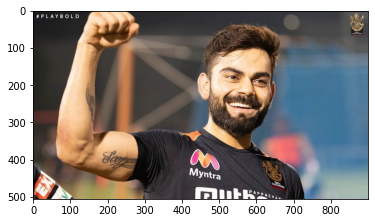

Neutral


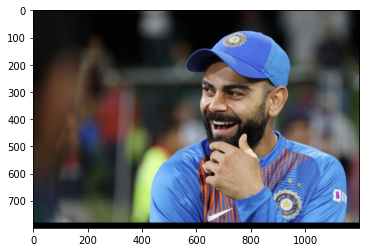

Happy


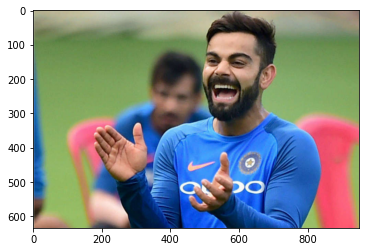

In [ ]:
import os
directory = "test"
for filename in os.listdir(directory):
  k = image.load_img(os.path.join(directory, filename),color_mode="grayscale",target_size=(48,48,1))
  img_pred=image.img_to_array(k)
  img_pred=np.expand_dims(img_pred, axis=0)
  rslt = model.predict(img_pred)
  if (rslt[0][0] == 1):
      print("Angry")
      i = mimg.imread(os.path.join(directory, filename))
      plt.imshow(i)
      plt.show()
  if (rslt[0][1] == 1):
      print("Disgust")
      i = mimg.imread(os.path.join(directory, filename))
      plt.imshow(i)
      plt.show()
  if (rslt[0][2] == 1):
      print("Fear")
      i = mimg.imread(os.path.join(directory, filename))
      plt.imshow(i)
      plt.show()
  if (rslt[0][3] == 1):
      print("Happy")
      i = mimg.imread(os.path.join(directory, filename))
      plt.imshow(i)
      plt.show()
  if (rslt[0][4] == 1):
      print("Sad")
      i = mimg.imread(os.path.join(directory, filename))
      plt.imshow(i)
      plt.show()
  if (rslt[0][5] == 1):
      print("Surprise")
      i = mimg.imread(os.path.join(directory, filename))
      plt.imshow(i)
      plt.show()
  if (rslt[0][6] == 1):
      print("Neutral")
      i = mimg.imread(os.path.join(directory, filename))
      plt.imshow(i)
      plt.show()

## One way 0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral

In [ ]:
## Second
from PIL import Image
im = Image.open("Kohli_AFP.jpg")
print(np.array(im,'float32'))

[[[17. 17. 17.]
  [16. 16. 16.]
  [16. 16. 16.]
  ...
  [ 2.  2.  2.]
  [ 2.  2.  2.]
  [ 3.  3.  3.]]

 [[15. 15. 15.]
  [15. 15. 15.]
  [15. 15. 15.]
  ...
  [ 2.  2.  2.]
  [ 2.  2.  2.]
  [ 2.  2.  2.]]

 [[15. 15. 15.]
  [15. 15. 15.]
  [15. 15. 15.]
  ...
  [ 2.  2.  2.]
  [ 2.  2.  2.]
  [ 3.  3.  3.]]

 ...

 [[ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  ...
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]

 [[ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  ...
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]

 [[ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  ...
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]]


In [ ]:
##Third way
test_image = mimg.imread("Kohli_AFP.jpg").astype('float32')
print(test_image)

[[[17. 17. 17.]
  [16. 16. 16.]
  [16. 16. 16.]
  ...
  [ 2.  2.  2.]
  [ 2.  2.  2.]
  [ 3.  3.  3.]]

 [[15. 15. 15.]
  [15. 15. 15.]
  [15. 15. 15.]
  ...
  [ 2.  2.  2.]
  [ 2.  2.  2.]
  [ 2.  2.  2.]]

 [[15. 15. 15.]
  [15. 15. 15.]
  [15. 15. 15.]
  ...
  [ 2.  2.  2.]
  [ 2.  2.  2.]
  [ 3.  3.  3.]]

 ...

 [[ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  ...
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]

 [[ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  ...
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]

 [[ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  ...
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]]
